In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("browser_test.csv")

df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [2]:
#Q1
dfe = df[df["slot"] == "exp"]
dfc = df[df["slot"] == "control"]

round((np.sum(dfe["n_clicks"])/np.sum(dfc["n_clicks"]) - 1)*100, 3)
#SUCCESS

1.614

In [3]:
#Q2
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

n = 100
e_clicks = dfe.n_clicks.values
c_clicks = dfc.n_clicks.values

np.random.seed(0)

dfe_median_scores = np.array(list(map(np.median, get_bootstrap_samples(e_clicks, n))))
dfc_median_scores = np.array(list(map(np.median, get_bootstrap_samples(c_clicks, n))))

delta_median_scores = dfe_median_scores - dfc_median_scores

dfe_mean_scores = np.array(list(map(np.mean, get_bootstrap_samples(e_clicks, n))))
dfc_mean_scores = np.array(list(map(np.mean, get_bootstrap_samples(c_clicks, n))))

delta_mean_scores = dfe_mean_scores - dfc_mean_scores

alpha = 0.05

stat_intervals(delta_median_scores, alpha), stat_intervals(delta_mean_scores, alpha)

#не содержит ноль, не содержит ноль SUCCESS!

(array([1., 1.]), array([0.19018207, 0.40760687]))

In [ ]:
#Q3 Z-критерий FAIL
#   Все ответы неверны SUCCESS!

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

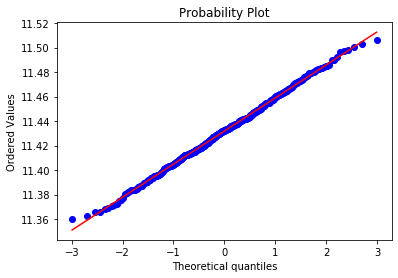

In [4]:
#Q4
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import probplot

np.random.seed(0)
n_boot_samples = 500

boot_c = get_bootstrap_samples(df["n_clicks"].values, n_boot_samples)
boot_c_mean = list(map(np.mean, boot_c))
boot_c_std = list(map(np.std, boot_c))

probplot(boot_c_mean, dist="norm", plot=plt)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

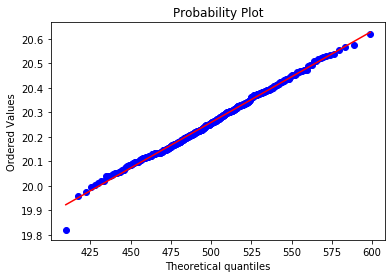

In [5]:
probplot(boot_c_std, dist="chi2", sparams=(n_boot_samples-1), plot=plt)

In [ ]:
#Q4 - для дисперсии больше 0.99, для средних больше 0.99


In [13]:
#Q5

from scipy.stats import mannwhitneyu

dfe_mw = dfe[["userID", "n_clicks"]]
dfc_mw = dfc[["userID", "n_clicks"]]

e_clicks = dfe_mw.groupby(["userID"]).sum()["n_clicks"].values
c_clicks = dfc_mw.groupby(["userID"]).sum()["n_clicks"].values

len(e_clicks), len(c_clicks)

mannwhitneyu(e_clicks, c_clicks)
#p<<0.01, поэтому отличие статистически ЗНАЧИМО (один ответ)

#Q7 - только для одного браузера!

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)